In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_files
import nltk
from nltk.corpus import stopwords
#stopword = stopwords.words('english')
stopwords = ['i','|>', 'the', '>>', '/' , '*' , 'I', '>', '|', '--', '-' , '|>', ':', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [11]:
d = load_files('data' , encoding = 'latin-1')

In [12]:
labels, count = np.unique(d.target , return_counts=True )
labels , count

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
        1000, 1000, 1000, 1000,  997, 1000, 1000, 1000, 1000], dtype=int64))

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(d.data , d.target , random_state=0)
len(x_train) , len(x_test)

(14997, 5000)

# DATA PRE-PROCESSING

### Making Vocabulary

In [14]:
dic={}
# Going through all the documents in x_train(about 14997).
for i in x_train:
    #Converting the whole document in lowercase because most stopwords usues lowercase.
    i = i.lower()
    #Converting the string into list of words
    words = i.split()
    # Now traversing through each word and recording its frequency if it is not in stopwords.
    for j in words:
        if j not in stopwords:
            dic[j] = dic.get(j,0)+1

In [15]:
# Sorting the dictionary in descending order and picking up top-2000 words in array Vocab.
x,y = [],[]
for i in sorted(dic, key=dic.get, reverse=True):
    x.append(i)
    y.append(dic[i])
    
vocab = np.array(x[:3000])
occurance = np.array(y[:3000])

In [45]:
occurance[4] , vocab[4]

(15035, 'lines:')

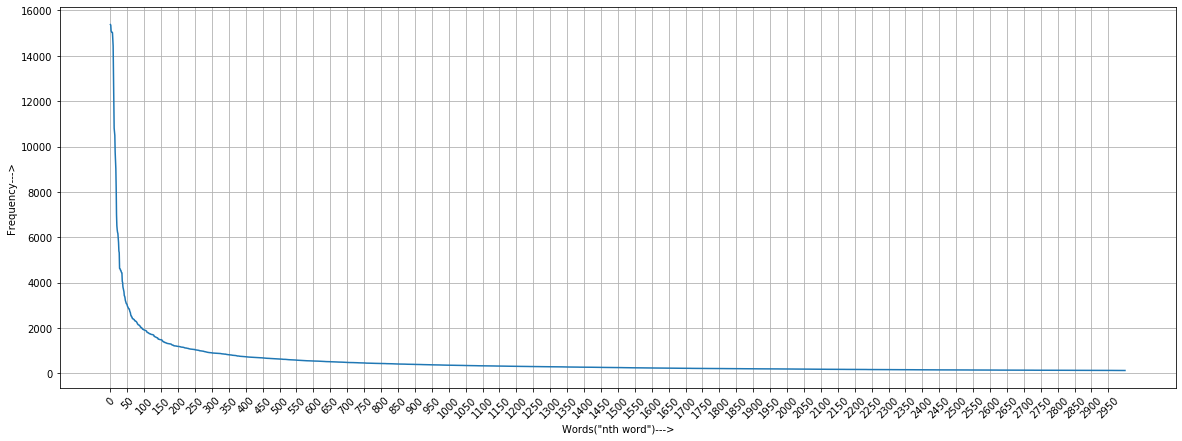

In [16]:
#This cell draws a frequency distribution graph for us to from where we can carefully observe the frequency trend of out list.
import matplotlib.pyplot as plt
#following are the limits for our graph.
lower_limit=0    #default
upper_limit=3000    #default
difference_between_each_xtick = 50  #default value. change these values to observe the graph in more depth
#adjusting size of the graph for more clearity.
plt.figure(figsize=(20, 7))
#plotting
plt.plot(np.arange(len(occurance))[lower_limit:upper_limit], occurance[lower_limit:upper_limit])
#labelling
plt.xlabel('Words("nth word")--->')
plt.ylabel("Frequency--->")
#adjusting the xticks
plt.xticks(np.arange(lower_limit, upper_limit, 50), rotation=45)
plt.grid()
plt.show()
#observe the following graph by changing the values of lower_limit, upper_limit and difference_between_each_xtick.

### Making Dataframe with column headers as vocabulary and data points as frequency.

In [8]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [9]:
from sklearn.decomposition import PCA
import time

In [11]:
# Making a dataframe where column headers are Vocab Words.
df = pd.DataFrame(columns=vocab, index=range(len(x_train)))
# Filling 0 over the whole dataframe.(intializing the frequency with 0)
df.fillna(0,inplace=True)

In [13]:
x_train[0].lower().split()

['path:',
 'cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!howland.reston.ans.net!darwin.sura.net!haven.umd.edu!cville-srv.wam.umd.edu!aap',
 'from:',
 'aap@wam.umd.edu',
 '(alberto',
 'adolfo',
 'pinkas)',
 'newsgroups:',
 'talk.politics.mideast',
 'subject:',
 're:',
 'israel:',
 'an',
 'apartheid',
 'state.',
 'date:',
 '10',
 'may',
 '1993',
 '19:50:34',
 'gmt',
 'organization:',
 'university',
 'of',
 'maryland,',
 'college',
 'park',
 'lines:',
 '72',
 'message-id:',
 '<1smbma$8mr@cville-srv.wam.umd.edu>',
 'references:',
 '<1slo0e$ag7@cville-srv.wam.umd.edu>',
 '<1993may10.162032.3955@colorado.edu>',
 '<1sm3h7$qek@cville-srv.wam.umd.edu>',
 'nntp-posting-host:',
 'rac3.wam.umd.edu',
 '>in',
 'article',
 '<1993may10.162032.3955@colorado.edu>',
 'perlman@qso.colorado.edu',
 '(eric',
 's.',
 'perlman)',
 'writes:',
 '>>',
 '>>in',
 'a',
 'word:',
 'utter',
 'and',
 'complete',
 'horse',
 'puckey.',
 'look',
 'the',
 'term',
 'up',
 'in',
 'the',
 '>>dictionary.',
 '>',

In [13]:
# Now traversing through the documents of whole training data.
for i in range(len(x_train)):
    # Converting the document into lowercase and making the list of words again
    s = x_train[i].lower().split()
    # Now traversing through each word
    for j in s:
        if j in stopwords or j 
        # If word is found in vocab, then increasing the frequency of that word in corresponding document.
        if j in vocab:
            if df[j][i]!=0:
                df[j][i]+=1
            else:
                df[j][i]=1

new x_train = df.values

new y_train = y_train

# PART-1 (Multinomial Naive Baye's)

### Training the Model

In [20]:
from sklearn import naive_bayes 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score

In [15]:
# Now we are training our model using the new x_train and new y_train. 
algo = naive_bayes.MultinomialNB()
algo.fit(df.values, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
algo.score(df.values, y_train)

0.8599053143962125

##### Converting the test documents into the required format of our model.

In [16]:
df_test = pd.DataFrame(columns=vocab, index=range(len(x_test)))
df_test.fillna(0,inplace=True)

In [17]:
for i in range(len(x_test)):
    s = x_test[i].lower().split()
    for j in s:
        if j in vocab:
            if df_test[j][i]!=0:
                df_test[j][i]+=1
            else:
                df_test[j][i]=1

In [22]:
y_pred = algo.predict(df_test.values)

In [25]:
print(accuracy_score(y_test, y_pred))

0.8304


# PART-2 (Implementing Naive Baye's from Scratch)

### Training the Model

In [35]:
def fit(x_train, y_train):
    dic = {}
    unique_classes = set(y_train)
    #Traversing all unique classes of output.
    for current_class in unique_classes:
        dic[current_class] = {}
        dic["total_data"] = len(y_train)
        total_words_of_current_class = 0
        current_class_rows = (y_train==current_class)
        x_train_current_class = x_train[current_class_rows]
        y_train_current_class = y_train[current_class_rows]
        dic[current_class]["total_count"] = len(y_train_current_class)
        #Traversing all words of Vocabulary, which are my column headers
        for word in x_train.columns:
            count_of_each_words_of_current_class = x_train_current_class.loc[: , word].sum() #Frequency of each word in vocab belonging to unique class.
            total_words_of_current_class += count_of_each_words_of_current_class #Adding up to get total words
            dic[current_class][word] = count_of_each_words_of_current_class
        dic[current_class]['total_words']  = total_words_of_current_class
        
    return dic

In [27]:
dic = fit(df, y_train)

### Predicting the Values

In [31]:
def probability(dictionary, document, current_class):
    output = np.log(dictionary[current_class]["total_count"]) - np.log(dictionary["total_data"])
    
    for word in document.split():
        if word in dictionary[current_class].keys():
            count_current_class_with_value_word = dictionary[current_class][word] + 1 
            count_total_words_in_current_class = dictionary[current_class]['total_words'] + (len(dic[current_class].keys())-2) 
            current_word_probability = np.log(count_current_class_with_value_word) - np.log(count_total_words_in_current_class)
            output = output + current_word_probability
    return output

In [28]:
def predictSinglePoint(dictionary, document):
    classes = dictionary.keys() # Taking out the unique output classes from dictionary.
    max_p = -10000
    best_class = -1
    first_run=True
    for current_class in classes: #Traversing through each class
        if current_class == 'total_data': # There is one entry in classes name 'total_data' which just stores the length of total documents. (Ignore that)
            continue
        else:
            p_current_class = probability(dictionary, document, current_class) # Calculating probability for document belong to each class
            if (first_run or p_current_class > max_p):
                max_p = p_current_class # Storing the class which has maximum probability
                best_class = current_class
            first_run=False
    return best_class

In [33]:
def predict(dictionary, X_test):
    y_pred=[]
    # Here we are getting the document and we are traversing through all the document.
    for i in X_test:
        final = predictSinglePoint(dictionary, i)
        y_pred.append(final)
    return y_pred

In [32]:
y_pred_2 = predict(dic, x_test)

In [34]:
accuracy_score(y_test, y_pred_2)

0.8052

### Random Testing

In [246]:
predict(dic, ['India beats africa in hockey by 2-0'])

[10]

In [245]:
predict(dic, ['Harley Davidson motors turn over jumped'])

[8]

# Part-3(Comparsions)

In [39]:
print("Accuracy using our written Code : ", accuracy_score(y_test, y_pred_2))
print("Accuracy using already implemented in SKlearn : " , accuracy_score(y_test, y_pred))

Accuracy using our written Code :  0.8052
Accuracy using already implemented in SKlearn :  0.8304


In [37]:
print(classification_report(y_test, y_pred_2))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.82      0.70       249
           1       0.71      0.83      0.77       242
           2       0.84      0.65      0.73       241
           3       0.82      0.85      0.83       252
           4       0.87      0.87      0.87       257
           5       0.86      0.78      0.81       266
           6       0.83      0.80      0.82       229
           7       0.83      0.90      0.87       228
           8       0.91      0.90      0.90       269
           9       0.88      0.93      0.91       246
          10       0.94      0.89      0.91       247
          11       0.89      0.90      0.89       248
          12       0.79      0.86      0.83       280
          13       0.87      0.87      0.87       223
          14       0.91      0.83      0.87       242
          15       0.84      1.00      0.91       259
          16       0.72      0.78      0.75       251
          17       0.85    

In [41]:
print("Using Written code by us")
print('---')
print(confusion_matrix(y_test, y_pred_2))

Using Written code by us
---
[[203   0   1   0   0   0   0   0   4   0   0   1   0   1   1   6   0   4
    6  22]
 [  0 202   3   6   2   6   2   0   4   0   0   1   7   1   5   0   1   0
    0   2]
 [  1  25 157  13   7  10   1   2   1   1   2   3   9   3   2   1   0   0
    3   0]
 [  1   5   4 213   7   5   3   2   0   0   1   2   8   1   0   0   0   0
    0   0]
 [  0   0   4   8 223   3   5   2   0   1   0   0   8   2   0   0   0   0
    0   1]
 [  0  25   8   2   1 207   3   3   1   0   1   4   4   2   1   0   1   0
    3   0]
 [  0   5   2   5   6   1 184   7   1   1   1   3   7   2   0   0   1   1
    1   1]
 [  0   1   1   0   1   3   1 206   2   1   1   0   4   0   1   0   2   0
    3   1]
 [  1   2   0   0   0   2   4   8 241   1   1   0   1   0   1   0   3   0
    4   0]
 [  2   0   0   0   0   0   2   2   1 230   4   0   1   1   0   0   1   2
    0   0]
 [  0   0   0   0   0   0   2   1   1  19 220   0   1   0   0   0   0   0
    2   1]
 [  3   3   0   1   1   1   1   0   